# Data preprocessing

## Imports

In [11]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from collections import defaultdict

## Data analisys

assign paths for the folders we need

for convenience, i will create a two-dimensional list so I don't have to write a lot of paths

In [9]:
def get_path(part: str = 'test', data: str = 'images') -> str:
    '''func for easy gettin` folder path'''
    return fr'D:\Helper\MLBazyak\homework\06_01\price_detection\data\{part}\{data}'

# data_parts
dp = [['test', 'images', 'labels'],
              ['train', 'images', 'labels'],
              ['valid', 'images', 'labels']]

In [10]:
# testin` our path`s func
print(get_path())
print(get_path(dp[0][0], dp[0][1]))
# noice

D:\Helper\MLBazyak\homework\06_01\price_detection\data\test\images
D:\Helper\MLBazyak\homework\06_01\price_detection\data\test\images


observe the distribution of classes in the folders

Class statistics in the folder test:
Class 0: 142 objects
Class 2: 142 objects
Class 1: 45 objects
Class 3: 53 objects
-----------------------------------------
Class statistics in the folder train:
Class 0: 1007 objects
Class 2: 1006 objects
Class 1: 281 objects
Class 3: 359 objects
-----------------------------------------
Class statistics in the folder valid:
Class 0: 290 objects
Class 2: 290 objects
Class 1: 82 objects
Class 3: 106 objects
-----------------------------------------


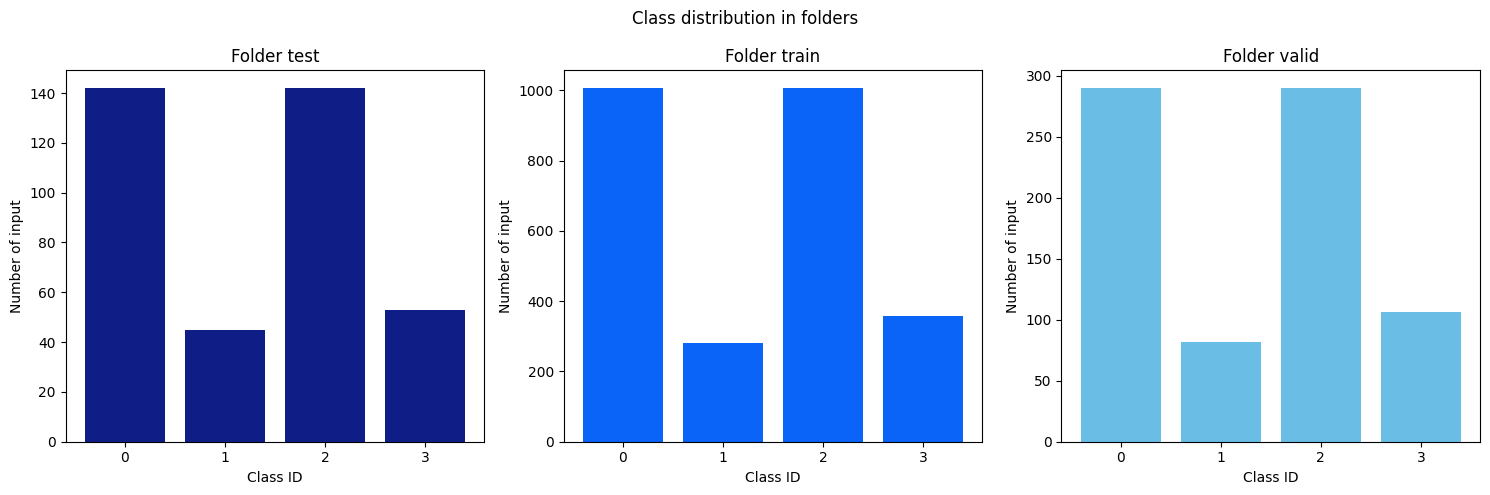

In [30]:
colors = ['#0f1d87', '#0a64f7', '#6abee6']         # set colors pallete that i want

fig, axes = plt.subplots(1,3, figsize=(15,5))      # assign graph
fig.suptitle('Class distribution in folders')

for i in range(3):                                 # going through all datasets 
    label_dir = get_path(dp[i][0], dp[1][2])
    class_stats = defaultdict(int)
    for label_file in os.listdir(label_dir):
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                class_stats[class_id] += 1

    print(f'Class statistics in the folder {dp[i][0]}:')      # printing classes statistic in folder
    for class_id, count in class_stats.items():
        print(f'Class {class_id}: {count} objects')
    print('-----------------------------------------')

    axes[i].bar(class_stats.keys(), class_stats.values(), color=colors[i])  # add a graph part
    axes[i].set_title(f'Folder {dp[i][0]}')
    axes[i].set_xlabel('Class ID')
    axes[i].set_ylabel('Number of input')
    axes[i].set_xticks(list(class_stats.keys()))

plt.tight_layout()
plt.show()

**after checking classes in YAT, i can say what:**

- 0 - product name
- 1 - price without stock
- 2 - up-to-date product price
- 3 - stock availability/type